In [1]:
import tensorflow as tf 
import numpy as np 
import sys
from pathlib import Path
from os.path import dirname, abspath
script_dir = Path(dirname(abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
sys.path.insert(0, module_dir + '/models')
print(module_dir)
import sde_evolve as se
import drift

C:\Users\pinak\Documents\GitHub\symmertic_attractor


Time taken by evolve is 60.57999920845032 seconds


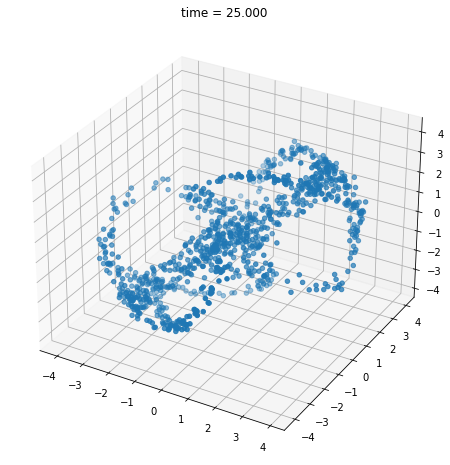

In [2]:
X0 = tf.random.uniform(minval=-1., maxval=1., shape=(1000, 3))
se.evolve(X0, drift.mu_np, sigma=0.1, dt=0.01, n_steps=2500, saveas='../plots/type1', animate_as='../plots/type1.mp4', idx2plt=[0, 1, 2])

Time taken by evolve is 59.175110816955566 seconds


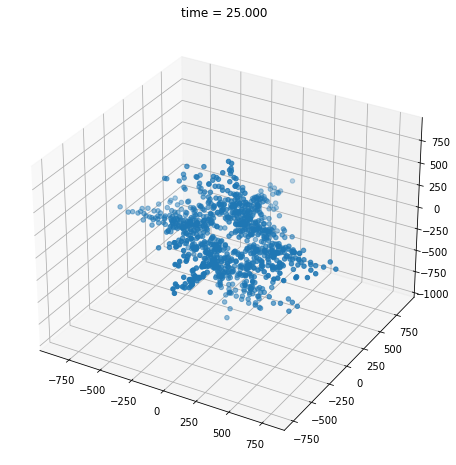

In [14]:
se.evolve(X0, lambda x: -drift.mu_np(x), sigma=0.1, dt=0.01, n_steps=2500, saveas='../plots/type3', animate_as='../plots/type3.mp4', idx2plt=[0, 1, 2])